In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/01-FDP%20Projections%20-%20(2023.03.30).csv')
df

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,Albert Okwuegbunam,DEN,TE,0,0,0,0,0,0,35,349,2
244,Jelani Woods,IND,TE,0,0,0,0,0,0,31,367,2
245,Logan Thomas,WAS,TE,0,0,0,0,0,0,26,294,3
246,Cade Otton,TB,TE,0,0,0,0,0,0,31,341,2


In [ ]:
df.shape # rows, columns
len(df) # num of rows

248

In [ ]:
df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0


In [ ]:
df.iloc[10:15, 0:10] # cross sections of data but rarely used in this course

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions
10,Tua Tagovailoa,MIA,QB,4514,26,16,38,201,5,0
11,Kirk Cousins,MIN,QB,4498,32,6,13,78,0,0
12,Deshaun Watson,CLE,QB,3795,25,4,63,355,1,0
13,Trey Lance,SFO,QB,2639,23,9,127,710,4,0
14,Kyler Murray,ARI,QB,3229,18,11,84,487,4,0


In [ ]:
', '.join(df.columns)

'Player, Team, Pos, PassingYds, PassingTD, Int, RushingAtt, RushingYds, RushingTD, Receptions, ReceivingYds, ReceivingTD'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        248 non-null    object
 1   Team          248 non-null    object
 2   Pos           248 non-null    object
 3   PassingYds    248 non-null    int64 
 4   PassingTD     248 non-null    int64 
 5   Int           248 non-null    int64 
 6   RushingAtt    248 non-null    int64 
 7   RushingYds    248 non-null    int64 
 8   RushingTD     248 non-null    int64 
 9   Receptions    248 non-null    int64 
 10  ReceivingYds  248 non-null    int64 
 11  ReceivingTD   248 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 23.4+ KB


In [ ]:
df = pd.DataFrame({
    'half_ppr_points': [10,12,13,14],
    'receptions': [3,4,7,9]
})

df.head()

,half_ppr_points,receptions
0,10,3
1,12,4
2,13,7
3,14,9


In [ ]:
# back to where we started

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/01-FDP%20Projections%20-%20(2023.03.30).csv')

scoring_weights = {
    'receptions': 1, # full-PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

df['FantasyPoints'] = ( df['Receptions'] * scoring_weights['receptions'] + df['ReceivingYds'] * scoring_weights['receiving_yds'] + df['ReceivingTD'] * scoring_weights['receiving_td'] \
                       + df['RushingYds'] * scoring_weights['rushing_yds'] + df['RushingTD'] * scoring_weights['rushing_td'] \
                        + df['PassingYds'] * scoring_weights['passing_yds'] + df['PassingTD'] * scoring_weights['passing_td'] \
                        + df['Int'] * scoring_weights['int'])

df.head()

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0,413.44
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0,402.10
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0,396.30
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0,364.60
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0,373.28


In [ ]:
rb_df = df.loc[df['Pos'] == 'RB']

In [ ]:
rb_df

,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
45,Christian McCaffrey,SFO,RB,0,0,0,299,1314,8,114,1059,3,417.3
46,Jonathan Taylor,IND,RB,0,0,0,329,1787,16,37,340,2,357.7
47,Austin Ekeler,LAC,RB,0,0,0,205,906,12,69,615,8,341.1
48,Saquon Barkley,NYG,RB,0,0,0,318,1225,3,79,506,3,288.1
49,Kenneth Walker III,SEA,RB,0,0,0,293,1212,8,54,434,1,272.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Hassan Haskins,TEN,RB,0,0,0,53,228,2,9,83,0,52.1
121,JaMycal Hasty,JAC,RB,0,0,0,52,219,0,9,75,0,38.4
122,Tyrion Davis-Price,SFO,RB,0,0,0,51,214,1,9,75,0,43.9
123,Latavius Murray,DEN,RB,0,0,0,56,218,3,5,33,0,48.1


In [ ]:
base_cols = ['Player', 'Pos', 'Team']
rushing_cols = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD']

rb_df = df.loc[df['Pos'] == 'RB', base_cols + rushing_cols]
rb_df.head()

,Player,Pos,Team,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
45,Christian McCaffrey,RB,SFO,417.3,114,1059,3,299,1314,8
46,Jonathan Taylor,RB,IND,357.7,37,340,2,329,1787,16
47,Austin Ekeler,RB,LAC,341.1,69,615,8,205,906,12
48,Saquon Barkley,RB,NYG,288.1,79,506,3,318,1225,3
49,Kenneth Walker III,RB,SEA,272.6,54,434,1,293,1212,8


In [ ]:
rb_df.sort_values(by='FantasyPoints', ascending=False).head()


,Player,Pos,Team,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
45,Christian McCaffrey,RB,SFO,417.3,114,1059,3,299,1314,8
46,Jonathan Taylor,RB,IND,357.7,37,340,2,329,1787,16
47,Austin Ekeler,RB,LAC,341.1,69,615,8,205,906,12
48,Saquon Barkley,RB,NYG,288.1,79,506,3,318,1225,3
49,Kenneth Walker III,RB,SEA,272.6,54,434,1,293,1212,8


In [ ]:
rb_df.describe()

,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,139.196250,27.062500,215.300000,0.800000,141.075000,618.037500,4.000000
std,81.434206,18.768641,153.126026,1.286739,79.015265,360.409452,3.260815
min,37.900000,4.000000,33.000000,0.000000,27.000000,113.000000,0.000000
25%,71.750000,13.000000,106.750000,0.000000,73.750000,309.000000,2.000000
50%,124.450000,24.000000,189.500000,0.000000,126.000000,570.000000,3.000000
75%,189.075000,33.500000,265.750000,1.000000,190.500000,830.750000,5.000000
max,417.300000,114.000000,1059.000000,8.000000,329.000000,1787.000000,16.000000


In [ ]:
rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

In [ ]:
rb_df.head()

,Player,Pos,Team,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,RushingTDRank
45,Christian McCaffrey,RB,SFO,417.3,114,1059,3,299,1314,8,11.0
46,Jonathan Taylor,RB,IND,357.7,37,340,2,329,1787,16,1.0
47,Austin Ekeler,RB,LAC,341.1,69,615,8,205,906,12,3.0
48,Saquon Barkley,RB,NYG,288.1,79,506,3,318,1225,3,44.0
49,Kenneth Walker III,RB,SEA,272.6,54,434,1,293,1212,8,11.0


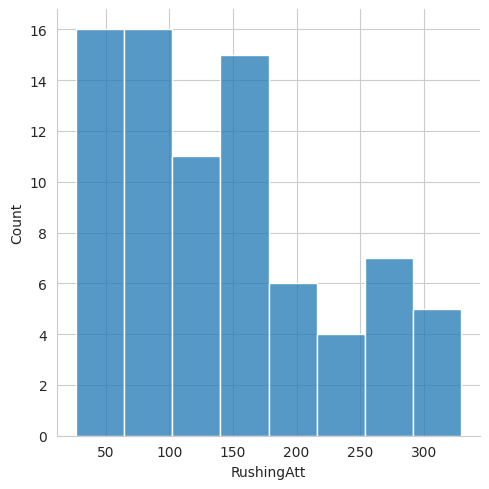

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.displot(rb_df['RushingAtt'])



<Axes: ylabel='Frequency'>

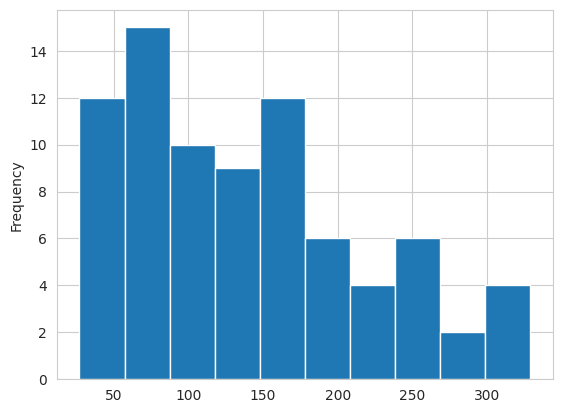

In [ ]:
rb_df['RushingAtt'].plot.hist()

In [ ]:
rb_df.values[:5]

array([['Christian McCaffrey', 'RB', 'SFO', 417.3, 114, 1059, 3, 299,
        1314, 8, 11.0],
       ['Jonathan Taylor', 'RB', 'IND', 357.70000000000005, 37, 340, 2,
        329, 1787, 16, 1.0],
       ['Austin Ekeler', 'RB', 'LAC', 341.1, 69, 615, 8, 205, 906, 12,
        3.0],
       ['Saquon Barkley', 'RB', 'NYG', 288.1, 79, 506, 3, 318, 1225, 3,
        44.0],
       ['Kenneth Walker III', 'RB', 'SEA', 272.6, 54, 434, 1, 293, 1212,
        8, 11.0]], dtype=object)

In [ ]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/02-ADP%20Data%20-%20(2023.03.30).csv')
adp_df.head()

,Player,Pos,Team,Current ADP
0,Justin Jefferson,WR,MIN,1.1
1,Ja'Marr Chase,WR,CIN,2.3
2,Christian McCaffrey,RB,SF,3.0
3,Cooper Kupp,WR,LAR,4.8
4,Tyreek Hill,WR,MIA,5.1


In [ ]:
adp_df['ADP RANK'] = adp_df['Current ADP'].rank()

adp_df.head()

,Player,Pos,Team,Current ADP,ADP RANK
0,Justin Jefferson,WR,MIN,1.1,1.0
1,Ja'Marr Chase,WR,CIN,2.3,2.0
2,Christian McCaffrey,RB,SF,3.0,3.0
3,Cooper Kupp,WR,LAR,4.8,4.0
4,Tyreek Hill,WR,MIA,5.1,5.0


In [ ]:
adp_df_cutoff = adp_df[:75]

adp_df_cutoff

,Player,Pos,Team,Current ADP,ADP RANK
0,Justin Jefferson,WR,MIN,1.1,1.0
1,Ja'Marr Chase,WR,CIN,2.3,2.0
2,Christian McCaffrey,RB,SF,3.0,3.0
3,Cooper Kupp,WR,LAR,4.8,4.0
4,Tyreek Hill,WR,MIA,5.1,5.0
...,...,...,...,...,...
70,Treylon Burks,WR,TEN,70.8,71.0
71,Kadarius Toney,WR,KC,72.0,72.0
72,Miles Sanders,RB,PHI,72.7,73.0
73,Diontae Johnson,WR,PIT,74.3,74.0


In [ ]:
replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows():
  position = row['Pos']
  player = row['Player']

  if position in replacement_players:
    replacement_players[position] = player

replacement_players

{'RB': 'Isiah Pacheco',
 'QB': 'Trevor Lawrence',
 'WR': 'Diontae Johnson',
 'TE': 'Dallas Goedert'}

In [ ]:
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]

df.head()

,Player,Pos,Team,FantasyPoints
0,Josh Allen,QB,BUF,413.44
1,Patrick Mahomes,QB,KAN,402.10
2,Jalen Hurts,QB,PHI,396.30
3,Joe Burrow,QB,CIN,364.60
4,Lamar Jackson,QB,BAL,373.28


In [ ]:
replacement_values = {}

for position, player_name in replacement_players.items():
  player = df.loc[df['Player'] == player_name]
  replacement_value = player['FantasyPoints'].tolist()[0]
  replacement_values[position] = replacement_value

replacement_values

{'RB': 146.2, 'QB': 295.36, 'WR': 212.5, 'TE': 166.0}

In [ ]:
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values[row['Pos']], axis=1
)
df.sort_values(by='VOR', ascending=False).head(100)

replacement_values

df.head()

<ipython-input-25-58ff23ee3c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VOR'] = df.apply(


,Player,Pos,Team,FantasyPoints,VOR
0,Josh Allen,QB,BUF,413.44,118.08
1,Patrick Mahomes,QB,KAN,402.10,106.74
2,Jalen Hurts,QB,PHI,396.30,100.94
3,Joe Burrow,QB,CIN,364.60,69.24
4,Lamar Jackson,QB,BAL,373.28,77.92


In [ ]:
df.sort_values(by='VOR', ascending=False).head()

,Player,Pos,Team,FantasyPoints,VOR
45,Christian McCaffrey,RB,SFO,417.3,271.1
46,Jonathan Taylor,RB,IND,357.7,211.5
125,Justin Jefferson,WR,MIN,408.9,196.4
47,Austin Ekeler,RB,LAC,341.1,194.9
215,Travis Kelce,TE,KAN,314.3,148.3


In [ ]:
df['VOR RANK'] = df['VOR'].rank(ascending=False)
df.head()

,Player,Pos,Team,FantasyPoints,VOR,VOR RANK
0,Josh Allen,QB,BUF,413.44,118.08,11.0
1,Patrick Mahomes,QB,KAN,402.10,106.74,14.0
2,Jalen Hurts,QB,PHI,396.30,100.94,16.0
3,Joe Burrow,QB,CIN,364.60,69.24,28.0
4,Lamar Jackson,QB,BAL,373.28,77.92,24.0


In [ ]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,45.0,-95.917333,111.345069,-251.96,-186.40,-103.58,0.000,118.08
RB,80.0,-7.003750,81.434206,-108.30,-74.45,-21.75,42.875,271.10
TE,33.0,-35.460606,56.726647,-166.00,-76.60,-37.50,-9.000,148.30
WR,90.0,-43.855556,73.035891,-137.60,-104.15,-56.55,2.250,196.40


In [ ]:
df.head()

,Player,Pos,Team,FantasyPoints,VOR,VOR RANK
0,Josh Allen,QB,BUF,413.44,118.08,11.0
1,Patrick Mahomes,QB,KAN,402.10,106.74,14.0
2,Jalen Hurts,QB,PHI,396.30,100.94,16.0
3,Joe Burrow,QB,CIN,364.60,69.24,28.0
4,Lamar Jackson,QB,BAL,373.28,77.92,24.0


In [ ]:
df = df.sort_values(by='VOR RANK')
df.head()
df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))
df.head()

,Player,Pos,Team,FantasyPoints,VOR,VOR RANK
45,Christian McCaffrey,RB,SFO,417.3,1.000000,1.0
46,Jonathan Taylor,RB,IND,357.7,0.886055,2.0
125,Justin Jefferson,WR,MIN,408.9,0.857187,3.0
47,Austin Ekeler,RB,LAC,341.1,0.854319,4.0
215,Travis Kelce,TE,KAN,314.3,0.765228,5.0


<Axes: xlabel='Pos', ylabel='VOR'>

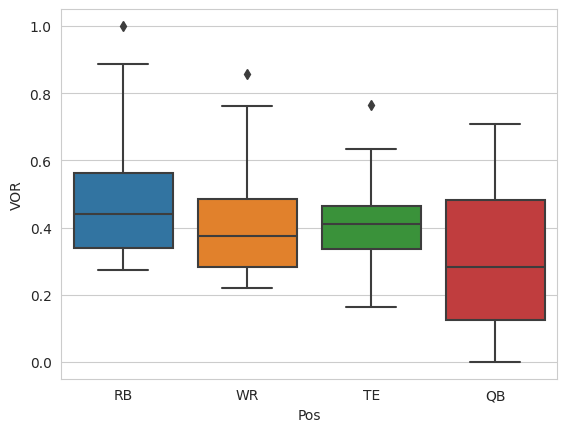

In [ ]:
sns.boxplot(x=df['Pos'], y=df['VOR'])

In [ ]:
df = df.rename({
    'VOR': 'Value',
    'VOR RANK': 'Value Rank'
}, axis=1)

df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank
45,Christian McCaffrey,RB,SFO,417.3,1.000000,1.0
46,Jonathan Taylor,RB,IND,357.7,0.886055,2.0
125,Justin Jefferson,WR,MIN,408.9,0.857187,3.0
47,Austin Ekeler,RB,LAC,341.1,0.854319,4.0
215,Travis Kelce,TE,KAN,314.3,0.765228,5.0


In [ ]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1)

adp_df.head()

,Player,Pos,Team,Current ADP,ADP Rank
0,Justin Jefferson,WR,MIN,1.1,1.0
1,Ja'Marr Chase,WR,CIN,2.3,2.0
2,Christian McCaffrey,RB,SF,3.0,3.0
3,Cooper Kupp,WR,LAR,4.8,4.0
4,Tyreek Hill,WR,MIA,5.1,5.0


In [ ]:
df['Player'] = df['Player'].replace({
    'Kenneth Walker III': 'Kenneth Walker',
    'Travis Etienne Jr.': 'Travis Etienne',
    'Brian Robinson Jr.': 'Brian Robinson',
    'Pierre Strong Jr.': 'Pierre Strong',
    'Michael Pittman Jr.': 'Michael Pittman',
    'A.J. Dillon': 'AJ Dillon',
    'D.J. Moore': 'DJ Moore'
})

In [ ]:
adp_df = adp_df.drop('Team', axis=1)
final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank
0,Christian McCaffrey,RB,SFO,417.3,1.000000,1.0,3.0,3.0
1,Jonathan Taylor,RB,IND,357.7,0.886055,2.0,11.2,11.0
2,Justin Jefferson,WR,MIN,408.9,0.857187,3.0,1.1,1.0
3,Austin Ekeler,RB,LAC,341.1,0.854319,4.0,12.7,12.0
4,Travis Kelce,TE,KAN,314.3,0.765228,5.0,6.2,6.0


In [ ]:
final_df['Diff in ADP and value'] = final_df['ADP Rank'] - final_df['Value Rank']
final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and value
0,Christian McCaffrey,RB,SFO,417.3,1.000000,1.0,3.0,3.0,2.0
1,Jonathan Taylor,RB,IND,357.7,0.886055,2.0,11.2,11.0,9.0
2,Justin Jefferson,WR,MIN,408.9,0.857187,3.0,1.1,1.0,-2.0
3,Austin Ekeler,RB,LAC,341.1,0.854319,4.0,12.7,12.0,8.0
4,Travis Kelce,TE,KAN,314.3,0.765228,5.0,6.2,6.0,1.0


In [ ]:
final_df.sort_values(by='Diff in ADP and value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and value
196,Tyrion Davis-Price,RB,SFO,43.90,0.286124,197.0,240.0,1533.0,1336.0
184,Eno Benjamin,RB,NOR,53.10,0.303713,185.0,239.9,1492.0,1307.0
226,Julio Jones,WR,TB,80.70,0.229725,227.0,240.0,1533.0,1306.0
228,Jarvis Landry,WR,NOR,74.90,0.218636,229.0,240.0,1533.0,1304.0
166,Zack Moss,RB,IND,61.10,0.319007,167.0,239.8,1467.5,1300.5
240,Zach Wilson,QB,NYJ,67.48,0.046037,241.0,240.0,1533.0,1292.0
243,Davis Mills,QB,HOU,53.82,0.019921,244.0,240.0,1533.0,1289.0
180,Logan Thomas,TE,WAS,73.40,0.304669,181.0,239.8,1467.5,1286.5
133,Chase Edmonds,RB,TB,90.90,0.375980,134.0,238.5,1419.0,1285.0
192,Latavius Murray,RB,DEN,48.10,0.294154,193.0,239.8,1467.5,1274.5
